# Primer intento Optuna

In [27]:
import pandas as pd 
import optuna as opt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

import plotly

In [3]:
df = pd.read_csv('../data/processed/supervised_data_energy.csv')

In [4]:
df.head()

,tmax-cab(t-12),tmax-hmo(t-12),tmax-obr(t-12),tmax-lmo(t-12),tmax-cul(t-12),tmin-cab(t-12),tmin-hmo(t-12),tmin-obr(t-12),tmin-lmo(t-12),tmin-cul(t-12),...,martes_postfestivo(t),semana_santa(t),1_mayo(t),10_mayo(t),16_sep(t),2_nov.(t),pre-navidad_y_new_year(t),navidad_y_new_year(t),post-navidad_y_new_year(t),demanda_energia(t)
0,21.0,22.0,25.0,30.0,29.0,2.0,9.0,8.0,10.0,9.0,...,0,0,0,0,0,0,0,1,0,1079
1,21.0,22.0,25.0,30.0,29.0,2.0,9.0,8.0,10.0,9.0,...,0,0,0,0,0,0,0,1,0,1086
2,21.0,22.0,25.0,30.0,29.0,2.0,9.0,8.0,10.0,9.0,...,0,0,0,0,0,0,0,1,0,1083
3,21.0,22.0,25.0,30.0,29.0,2.0,9.0,8.0,10.0,9.0,...,0,0,0,0,0,0,0,1,0,1073
4,21.0,22.0,25.0,30.0,29.0,2.0,9.0,8.0,10.0,9.0,...,0,0,0,0,0,0,0,1,0,1067


In [6]:
X = df[df.columns[0:-1]]
y = df[df.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [9]:
def objective(trial):
    # Suggest values for hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 10, 50, log=True)
    max_depth = trial.suggest_int("max_depth", 5, 70)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)

    # Create and fit random forest model
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train, y_train)

    # Make predictions and calculate RMSE
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_absolute_percentage_error(y_test, y_pred))

    # Return MAE
    return rmse

In [10]:
# Create study object
study = opt.create_study(direction="minimize")

# Run optimization process
study.optimize(objective, n_trials=20, show_progress_bar=True)

[I 2024-05-22 13:31:27,765] A new study created in memory with name: no-name-84550898-b52f-4ba3-9f44-ff0a55b33160


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2024-05-22 13:43:51,815] Trial 0 finished with value: 0.0982235468864316 and parameters: {'n_estimators': 23, 'max_depth': 58, 'min_samples_split': 13, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.0982235468864316.
[I 2024-05-22 13:55:58,035] Trial 1 finished with value: 0.1014347062565117 and parameters: {'n_estimators': 30, 'max_depth': 19, 'min_samples_split': 4, 'min_samples_leaf': 14}. Best is trial 0 with value: 0.0982235468864316.
[I 2024-05-22 14:00:58,996] Trial 2 finished with value: 0.1001679656130256 and parameters: {'n_estimators': 11, 'max_depth': 45, 'min_samples_split': 15, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.0982235468864316.
[I 2024-05-22 14:03:04,739] Trial 3 finished with value: 0.10179930607881577 and parameters: {'n_estimators': 12, 'max_depth': 68, 'min_samples_split': 5, 'min_samples_leaf': 12}. Best is trial 0 with value: 0.0982235468864316.
[I 2024-05-22 14:05:05,231] Trial 4 finished with value: 0.10202107530291812 and parameters

In [11]:
# Import optuna.visualization
import optuna.visualization as vis

# Plot optimization history
vis.plot_optimization_history(study)

In [12]:
# Plot parameter importance
vis.plot_param_importances(study)

In [13]:
# Plot contour plot
fig_contour = vis.plot_contour(study, params=["min_samples_split", "max_depth"])
fig_contour

In [31]:
plotly.offline.plot(fig_contour, filename='images/fig_contour')

'images/fig_contour.html'

In [14]:
# Plot parallel_coordinate
vis.plot_parallel_coordinate(study)

In [22]:
study.best_params

{'n_estimators': 50,
 'max_depth': 30,
 'min_samples_split': 9,
 'min_samples_leaf': 1}

In [17]:
study.best_value

0.09710873324181077

In [23]:
best_model = RandomForestRegressor(n_estimators= 50,
 max_depth= 30,
 min_samples_split= 9,
 min_samples_leaf=1)

In [24]:
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, min_samples_split=9, n_estimators=50)

In [25]:
y_pred = best_model.predict(X_test)

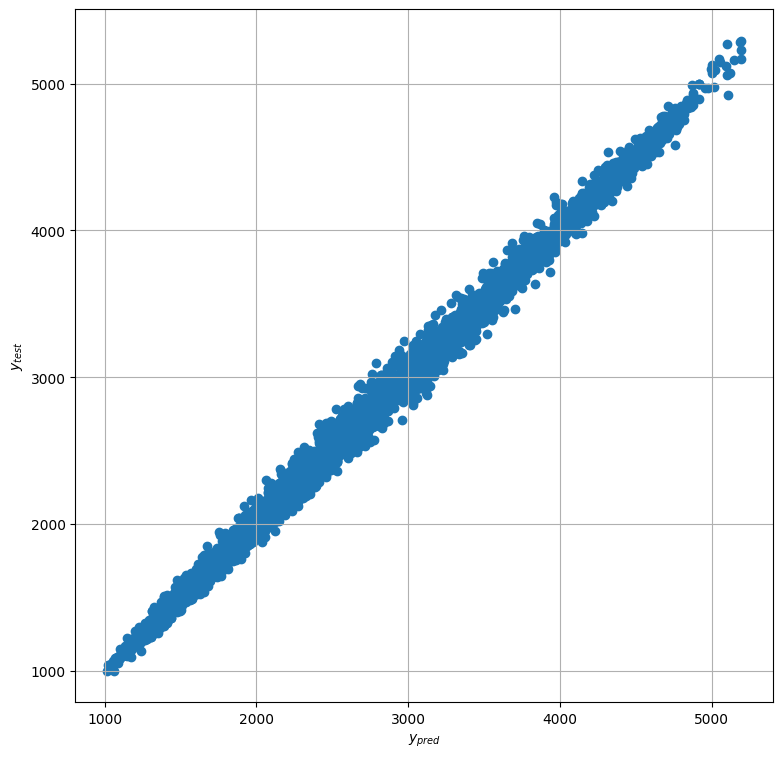

In [29]:
fig,ax = plt.subplots(figsize=(9,9))
ax.grid()
ax.scatter(y_pred, y_test)
ax.set_ylabel(r'$y_{test}$')
ax.set_xlabel(r'$y_{pred}$')
plt.show()

In [30]:
error = np.abs(y_test - y_pred)

{'bodies': [<matplotlib.collections.PolyCollection at 0x1f151b22c90>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1f151bde6f0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1f151b3c1a0>,
 'cbars': <matplotlib.collections.LineCollection at 0x1f1965f1e80>}

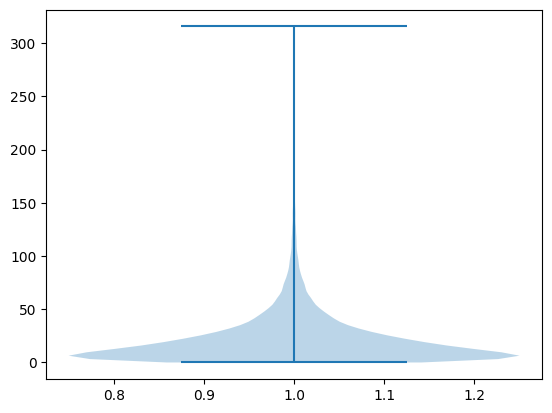

In [41]:
plt.violinplot(error)

In [42]:
print(f'El error máximo fué {np.max(error)}')
print(f'El error mínimo fué {np.min(error)}')
print(f'El error promedio fué {np.max(error)}')
print(f'La desviación estándar del error fue {np.std(error)}')

El error máximo fué 315.71339498143743
El error mínimo fué 9.442191799280408e-05
El error promedio fué 315.71339498143743
La desviación estándar del error fue 26.441448096974504


In [48]:
np.sort(error)

array([9.44219180e-05, 8.72821622e-04, 1.02036852e-03, ...,
       2.74173568e+02, 2.78423913e+02, 3.15713395e+02])

In [51]:
mean_absolute_percentage_error(y_pred, y_test)

0.009485907719548683